In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e25/sample_submission.csv
/kaggle/input/playground-series-s3e25/train.csv
/kaggle/input/playground-series-s3e25/test.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/playground-series-s3e25/train.csv").drop(columns="id")
test = pd.read_csv("/kaggle/input/playground-series-s3e25/test.csv").drop(columns="id")
submission= pd.read_csv("/kaggle/input/playground-series-s3e25/sample_submission.csv")

In [4]:
categorical = df.select_dtypes(include='object').columns.to_list()
numerical = df.select_dtypes(include=['int64','float64']).columns.to_list()
numerical

['allelectrons_Total',
 'density_Total',
 'allelectrons_Average',
 'val_e_Average',
 'atomicweight_Average',
 'ionenergy_Average',
 'el_neg_chi_Average',
 'R_vdw_element_Average',
 'R_cov_element_Average',
 'zaratio_Average',
 'density_Average',
 'Hardness']

## Pre Inspection

In [5]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 4.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
def inspection(data):
    print("Shape of dataset: ",data.shape)
    print("\n Top 5 rows of dataset :")
    display(data.head())
    print("\n Description of Dataset:")
    display(data.describe().T)
    print("\n Information of Dataset:")
    display(pd.DataFrame(data.info(),columns=['Info']))
    print("\nDataset Data Types:")
    display(pd.DataFrame(data.dtypes, columns=['Data Type']))
    print("\n Description of Dataset:")
    display(data.describe())
    print("\nPercentage of Missing Values:")
    display(pd.DataFrame(data.isnull().mean()*100, columns=['Missing Values']))
    print("\nDuplicated Rows:")
    duplicated_rows= data[data.duplicated()]
    if duplicated_rows.empty:
        print('\nNo Duplicates')
    else:
        display(duplicated_rows)
        data.drop(duplicated_rows.index, axis=0,inplace=True)
    print("\nCategorical Columns:")
    categorical = data.select_dtypes(include='object').columns
    if len(categorical)==0:
        print("\nNo Categorical Columns")
    else:
        for i in categorical:
            unique = data[i].unique()
            unique_df = pd.DataFrame({i:unique})
            display(unique_df)

In [8]:
inspection(df)

Shape of dataset:  (10407, 12)

 Top 5 rows of dataset :


,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0



 Description of Dataset:


,count,mean,std,min,25%,50%,75%,max
allelectrons_Total,10407.0,128.053516,224.123776,0.0,68.000000,100.000000,131.000000,15300.000000
density_Total,10407.0,14.491342,15.972877,0.0,7.558488,10.650000,16.676996,643.093804
allelectrons_Average,10407.0,17.033222,10.468734,0.0,10.000000,12.600000,22.000000,67.000000
val_e_Average,10407.0,4.546789,0.690864,0.0,4.000000,4.714286,4.800000,6.000000
atomicweight_Average,10407.0,37.507703,26.012313,0.0,20.298893,26.203827,48.719500,167.400000
ionenergy_Average,10407.0,10.938308,1.408276,0.0,10.590660,11.202760,11.670725,15.245810
el_neg_chi_Average,10407.0,2.607662,0.334906,0.0,2.530000,2.706000,2.805000,3.443000
R_vdw_element_Average,10407.0,1.731330,0.192481,0.0,1.672500,1.732727,1.800000,2.250000
R_cov_element_Average,10407.0,0.944132,0.180017,0.0,0.864000,0.915556,0.981667,1.615840
zaratio_Average,10407.0,0.493349,0.063080,0.0,0.476196,0.488550,0.496070,0.825990



 Information of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     10407 non-null  float64
 1   density_Total          10407 non-null  float64
 2   allelectrons_Average   10407 non-null  float64
 3   val_e_Average          10407 non-null  float64
 4   atomicweight_Average   10407 non-null  float64
 5   ionenergy_Average      10407 non-null  float64
 6   el_neg_chi_Average     10407 non-null  float64
 7   R_vdw_element_Average  10407 non-null  float64
 8   R_cov_element_Average  10407 non-null  float64
 9   zaratio_Average        10407 non-null  float64
 10  density_Average        10407 non-null  float64
 11  Hardness               10407 non-null  float64
dtypes: float64(12)
memory usage: 975.8 KB


,Info



Dataset Data Types:


,Data Type
allelectrons_Total,float64
density_Total,float64
allelectrons_Average,float64
val_e_Average,float64
atomicweight_Average,float64
ionenergy_Average,float64
el_neg_chi_Average,float64
R_vdw_element_Average,float64
R_cov_element_Average,float64
zaratio_Average,float64



 Description of Dataset:


,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000



Percentage of Missing Values:


,Missing Values
allelectrons_Total,0.0
density_Total,0.0
allelectrons_Average,0.0
val_e_Average,0.0
atomicweight_Average,0.0
ionenergy_Average,0.0
el_neg_chi_Average,0.0
R_vdw_element_Average,0.0
R_cov_element_Average,0.0
zaratio_Average,0.0



Duplicated Rows:

No Duplicates

Categorical Columns:

No Categorical Columns


In [9]:
inspection(test)

Shape of dataset:  (6939, 11)

 Top 5 rows of dataset :


,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
1,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
2,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
3,100.0,9.107996,10.00,4.80,20.298893,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
4,55.0,4.030000,11.00,4.00,22.977675,11.280950,2.455,1.7500,0.893333,0.476095,0.93456



 Description of Dataset:


,count,mean,std,min,25%,50%,75%,max
allelectrons_Total,6939.0,126.460128,207.564499,0.0,68.000000,100.000000,128.000000,10116.000000
density_Total,6939.0,14.794020,18.982447,0.0,7.558488,10.650000,16.601328,643.093804
allelectrons_Average,6939.0,17.406186,10.996089,0.0,10.000000,12.666667,22.000000,67.000000
val_e_Average,6939.0,4.546852,0.683158,0.0,4.000000,4.750000,4.800000,6.000000
atomicweight_Average,6939.0,38.422790,27.344351,0.0,20.298893,26.203827,48.719500,167.400000
ionenergy_Average,6939.0,10.921512,1.378980,0.0,10.584314,11.202760,11.645560,15.245810
el_neg_chi_Average,6939.0,2.608119,0.322873,0.0,2.527500,2.706000,2.806667,3.443000
R_vdw_element_Average,6939.0,1.737907,0.190584,0.0,1.678000,1.736000,1.820000,2.250000
R_cov_element_Average,6939.0,0.949638,0.179266,0.0,0.866667,0.920000,0.990000,1.615333
zaratio_Average,6939.0,0.491675,0.060829,0.0,0.476095,0.488550,0.496118,0.825990



 Information of Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6939 entries, 0 to 6938
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     6939 non-null   float64
 1   density_Total          6939 non-null   float64
 2   allelectrons_Average   6939 non-null   float64
 3   val_e_Average          6939 non-null   float64
 4   atomicweight_Average   6939 non-null   float64
 5   ionenergy_Average      6939 non-null   float64
 6   el_neg_chi_Average     6939 non-null   float64
 7   R_vdw_element_Average  6939 non-null   float64
 8   R_cov_element_Average  6939 non-null   float64
 9   zaratio_Average        6939 non-null   float64
 10  density_Average        6939 non-null   float64
dtypes: float64(11)
memory usage: 596.4 KB


,Info



Dataset Data Types:


,Data Type
allelectrons_Total,float64
density_Total,float64
allelectrons_Average,float64
val_e_Average,float64
atomicweight_Average,float64
ionenergy_Average,float64
el_neg_chi_Average,float64
R_vdw_element_Average,float64
R_cov_element_Average,float64
zaratio_Average,float64



 Description of Dataset:


,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
count,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000,6939.000000
mean,126.460128,14.794020,17.406186,4.546852,38.422790,10.921512,2.608119,1.737907,0.949638,0.491675,2.152065
std,207.564499,18.982447,10.996089,0.683158,27.344351,1.378980,0.322873,0.190584,0.179266,0.060829,1.958213
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.000000,7.558488,10.000000,4.000000,20.298893,10.584314,2.527500,1.678000,0.866667,0.476095,0.812440
50%,100.000000,10.650000,12.666667,4.750000,26.203827,11.202760,2.706000,1.736000,0.920000,0.488550,1.351550
75%,128.000000,16.601328,22.000000,4.800000,48.719500,11.645560,2.806667,1.820000,0.990000,0.496118,2.780220
max,10116.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615333,0.825990,10.970000



Percentage of Missing Values:


,Missing Values
allelectrons_Total,0.0
density_Total,0.0
allelectrons_Average,0.0
val_e_Average,0.0
atomicweight_Average,0.0
ionenergy_Average,0.0
el_neg_chi_Average,0.0
R_vdw_element_Average,0.0
R_cov_element_Average,0.0
zaratio_Average,0.0



Duplicated Rows:

No Duplicates

Categorical Columns:

No Categorical Columns


## EDA

In [10]:
def dis_outliers(data):
    for i in numerical:
        q1= data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        lower= q1-1.5*iqr
        upper=q3+1.5*iqr
        outliers_count = ((data[i] < lower) | (data[i] > upper)).sum()
        percentage = (outliers_count / len(data)) * 100
        print(i)
        print('\n Outliers percentage : ',percentage)
        fig,axes = plt.subplots(1,2,figsize=(12,5))
        sns.boxplot(x=data[i],ax=axes[0])
        axes[0].set_title(f'BoxPlot of {i}')
        sns.histplot(data[i],ax=axes[1])
        axes[0].set_title(f'Distribution of {i}')
        plt.show()

allelectrons_Total

 Outliers percentage :  9.733832997021235


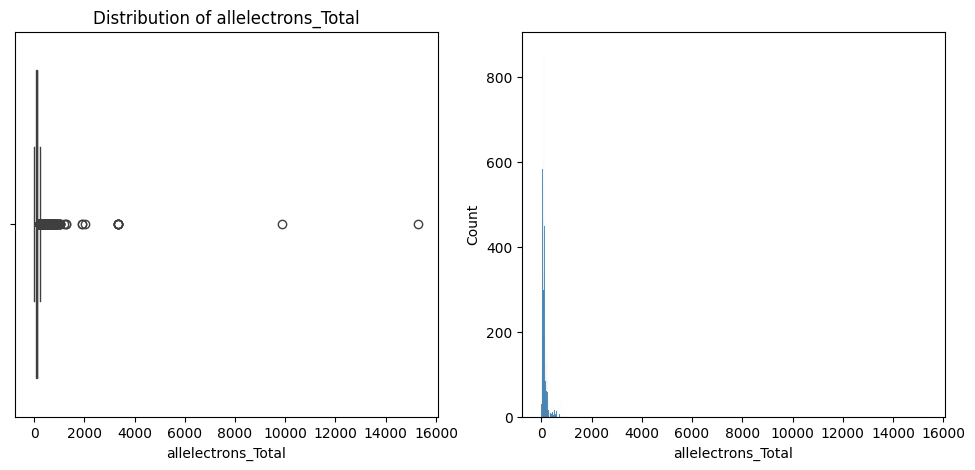

density_Total

 Outliers percentage :  8.311713269914481


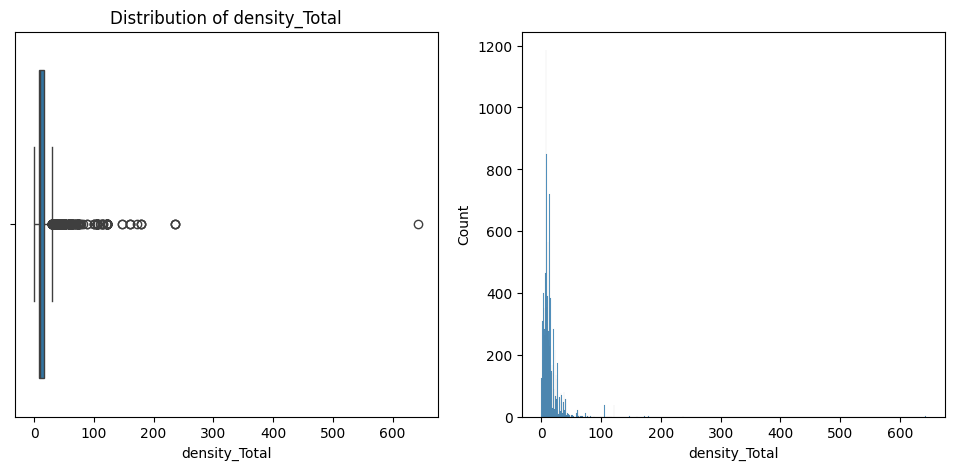

allelectrons_Average

 Outliers percentage :  5.736523493802249


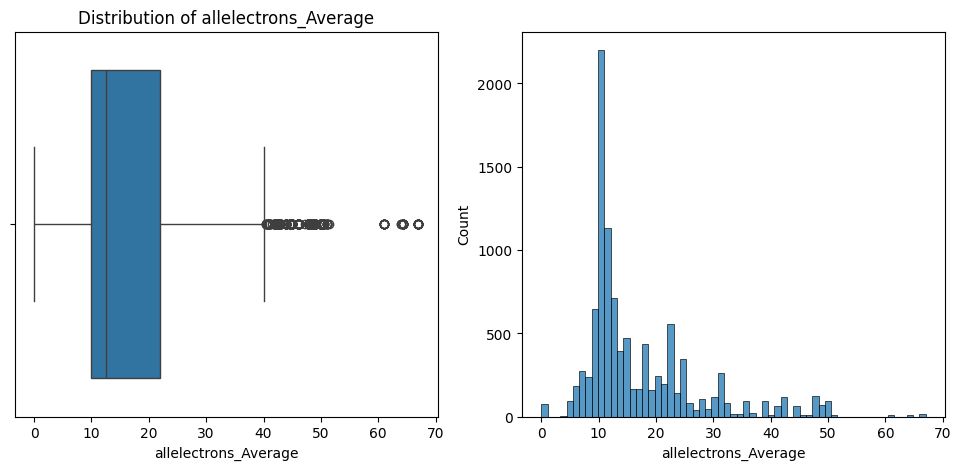

val_e_Average

 Outliers percentage :  1.8641299125588546


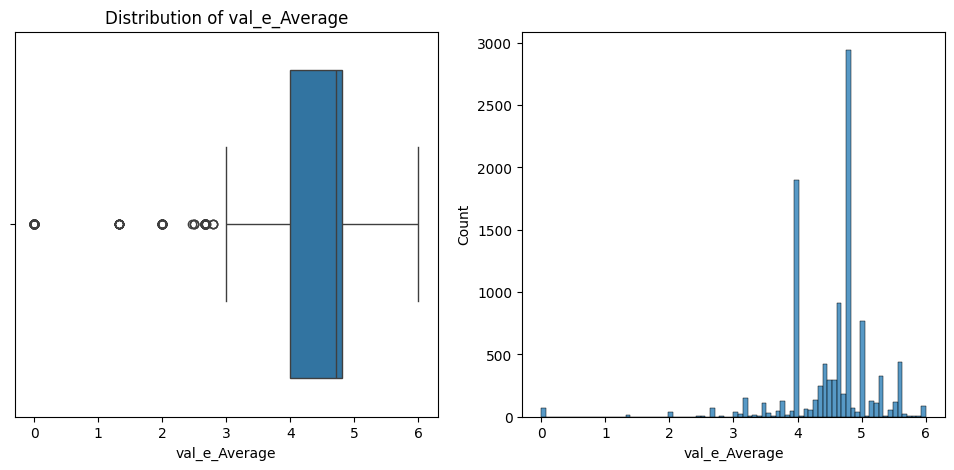

atomicweight_Average

 Outliers percentage :  6.399538771980398


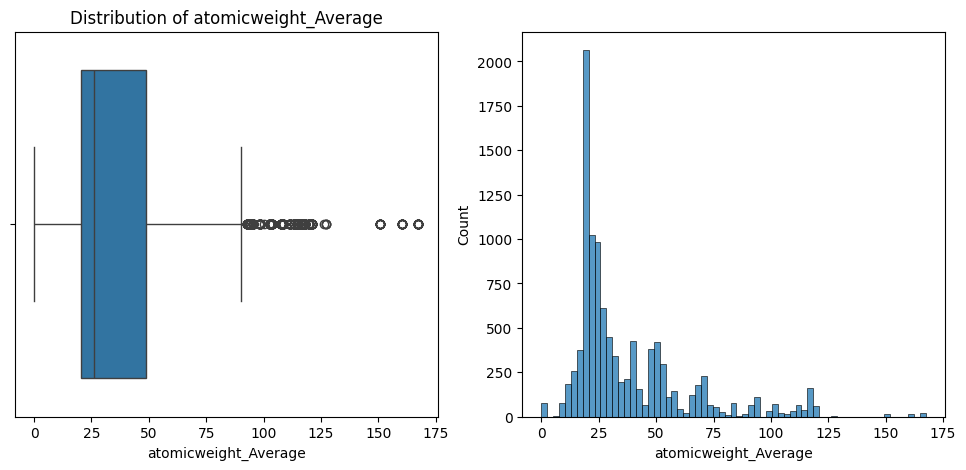

ionenergy_Average

 Outliers percentage :  5.947919669453253


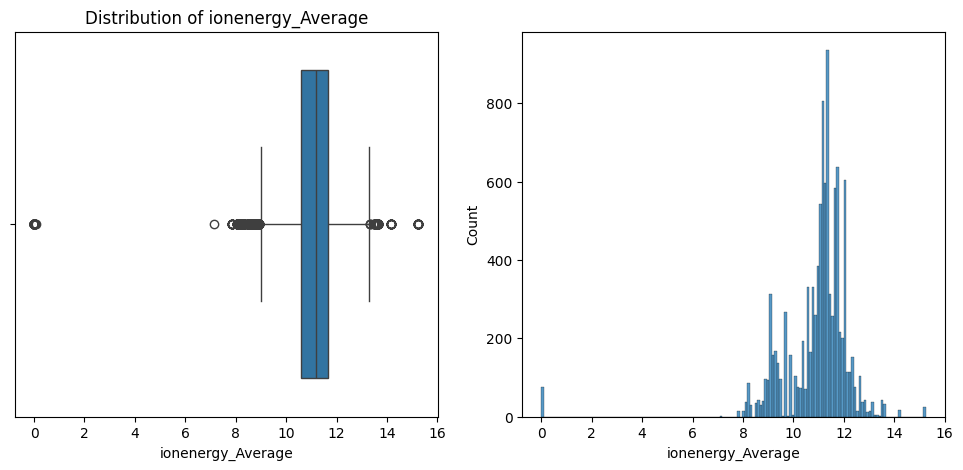

el_neg_chi_Average

 Outliers percentage :  7.283559142884596


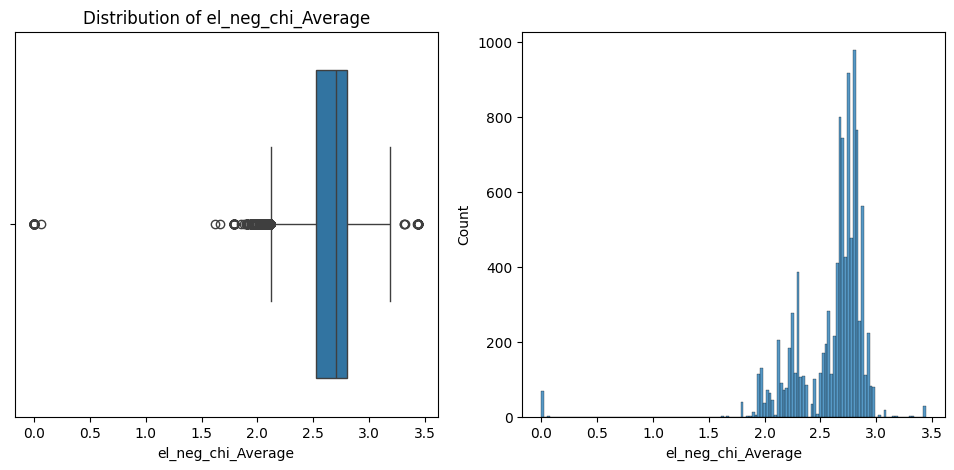

R_vdw_element_Average

 Outliers percentage :  7.0049005477082735


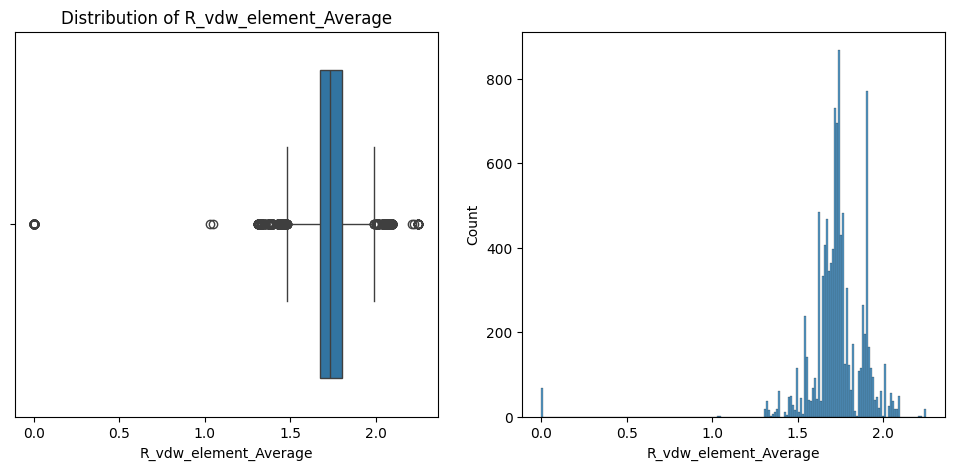

R_cov_element_Average

 Outliers percentage :  17.959066013260305


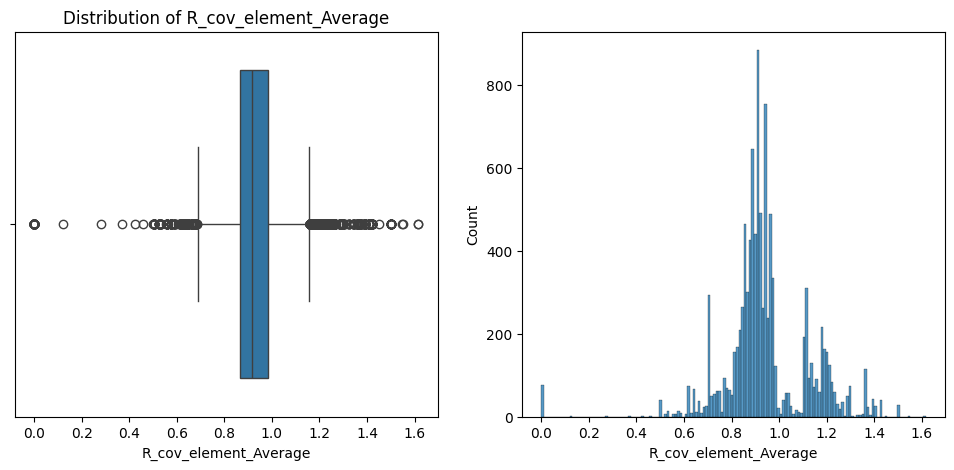

zaratio_Average

 Outliers percentage :  14.711252041894879


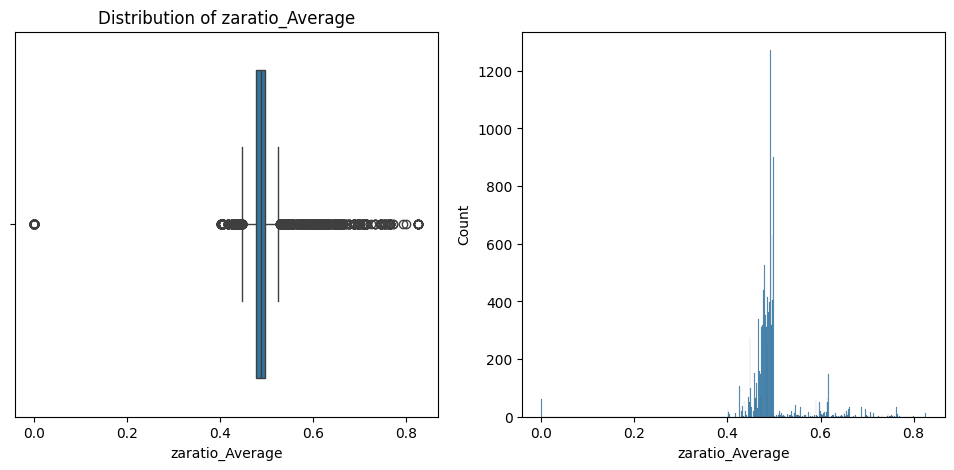

density_Average

 Outliers percentage :  7.54299990391083


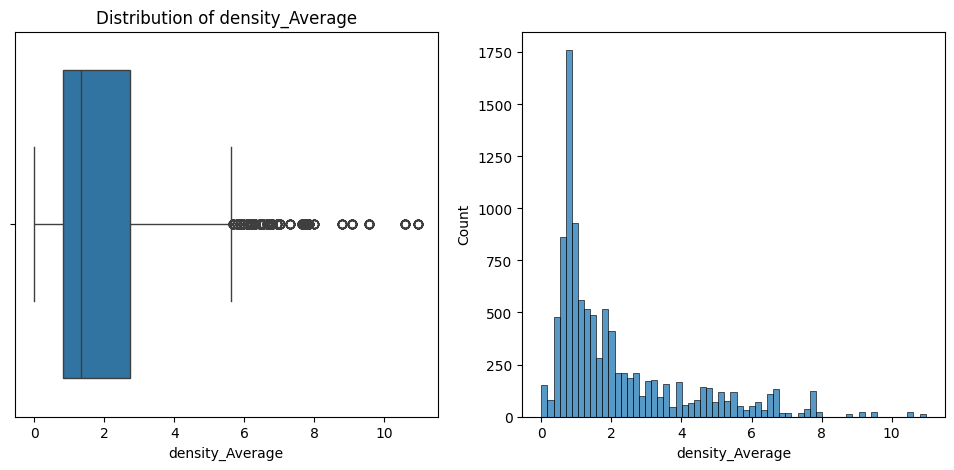

Hardness

 Outliers percentage :  0.0


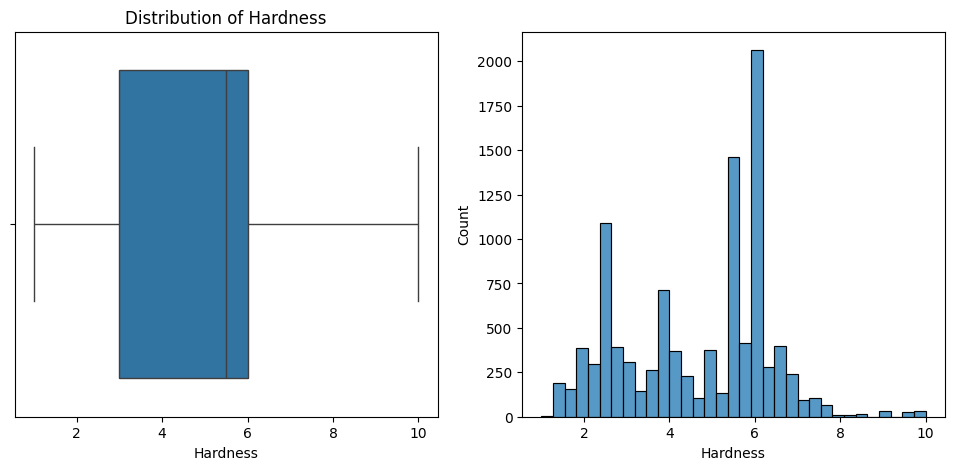

In [11]:
dis_outliers(df)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fdf=df.drop('Hardness',axis=1) # features from train data
scdf= scaler.fit_transform(fdf) # scaled features from train data
tdf= scaler.transform(test)  # scaled features from test data
scaled_df= pd.DataFrame(scdf,columns = fdf.columns) # scaled features into dataframe
scaled_test= pd.DataFrame(tdf,columns = test.columns) # scaled features into dataframe

In [13]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install catboost lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 3.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [16]:
X_train = scaled_df
X_test= scaled_test
y_train=df['Hardness']

## Training Data Base Models

In [17]:
def evaluate_models(models, features, target, scoring_metric):
    results = {}
    for model_name, model in models.items():
        cv_results = cross_val_score(model, features, target, cv=5, scoring=make_scorer(scoring_metric, greater_is_better=False))
        mean_score = -cv_results.mean()
        results[model_name] = mean_score
    return results

In [18]:
models = {
    'Random Forest': RandomForestRegressor(),
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGBoost': XGBRegressor(),
    'SVR': SVR(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'KNN': KNeighborsRegressor(),
    'LGBM':LGBMRegressor(verbose=-1),
    'CatB':CatBoostRegressor(logging_level='Silent')
}
results = evaluate_models(models,scaled_df,df['Hardness'],mean_absolute_error)
for model_name, score in results.items():
    print(f"{model_name}: {score}")

Random Forest: 0.9075316156232486
Linear Regression: 1.1785928182896817
Decision Tree: 1.2002510768256411
XGBoost: 0.9358934360205335
SVR: 0.9548307874918243
Ridge: 1.178612304771915
Lasso: 1.4904885829647214
KNN: 1.0023442632924668
LGBM: 0.8963538105898593
CatB: 0.9007113155266693


## Tuning 1 by 1 on top 4 performers

In [19]:
features=scaled_df
target=df['Hardness']

In [20]:
def best_para(model,param_grid):
    grid_search = GridSearchCV(estimator=model,
                               param_grid=param_grid,
                               scoring=make_scorer(mean_absolute_error, greater_is_better=False),
                               cv=5)
    grid_search.fit(features, target)
    if grid_search.best_params_ is not None and grid_search.best_score_ is not None:
        return grid_search.best_params_, -grid_search.best_score_
    else:
        return None, None

## CatBoost

In [21]:
param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2]
}
cat_params,score= best_para(CatBoostRegressor(logging_level='Silent'),param_grid)
print(cat_params)
print(score)

{'iterations': 200, 'learning_rate': 0.2}
0.9101822236134115


## LGBM

In [22]:
param_grid = {
    'boosting_type': ['gbdt', 'dart', 'goss'],  # Different boosting types
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate
    'n_estimators': [50, 100, 200]  # Number of boosting rounds
}
lb_params,score= best_para(LGBMRegressor(verbose=-1),param_grid)
print(lb_params)
print(score)

{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators': 100}
0.8963538105898593


## XGBoost

In [23]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.5]
}
xg_params,score= best_para(XGBRegressor(),param_grid)
print(xg_params)
print(score)

{'gamma': 0, 'learning_rate': 0.1, 'n_estimators': 100}
0.9053579967715241


## Random Forest

In [24]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}
rf_params,score= best_para(RandomForestRegressor(),param_grid)
print(rf_params)
print(score)

{'max_depth': 20, 'n_estimators': 200}
0.9045892067933853


## Final Predictions

#### CatBoost

In [25]:
model_cat= CatBoostRegressor(logging_level='Silent',**cat_params)
model_cat.fit(X_train,y_train)
predict_cat=model_cat.predict(X_test)

#### LGBM

In [26]:
model_lb= LGBMRegressor(verbose=-1,**lb_params)
model_lb.fit(X_train,y_train)
predict_lb=model_lb.predict(X_test)

#### XGBoost

In [27]:
model_xg= XGBRegressor(**xg_params)
model_xg.fit(X_train,y_train)
predict_xg=model_xg.predict(X_test)

#### Random Forest

In [28]:
model_rf= RandomForestRegressor(**rf_params)
model_rf.fit(X_train,y_train)
predict_rf=model_rf.predict(X_test)

In [29]:
avg_predictions = (predict_rf + predict_lb + predict_xg + predict_cat)/4

In [30]:
submission['Hardness']=avg_predictions
submission.to_csv('submission.csv', index=False)

In [31]:
submission

,id,Hardness
0,10407,2.713400
1,10408,2.706321
2,10409,5.771029
3,10410,4.228532
4,10411,5.200078
...,...,...
6934,17341,5.851083
6935,17342,4.096653
6936,17343,5.153753
6937,17344,4.579944
